<a href="https://colab.research.google.com/github/yvanoliveira/yvanoliveira.github.io/blob/main/An%C3%A1lise_de_velocidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considerando que são conhecidos os os valores de $θ_2$, $θ_3$ e $θ_4$ de uma análise de posição feita previamente, assim como o $w_2$ e, que se sabe também os comprimentos dos elos $R_1$, $R_2$, $R_3$ e $R_4$.

Para descobrir os valores de $w_3$ e $w_4$, assim também como as velocidades das juntas, serão realizados os procedimentos abaixo como segue.

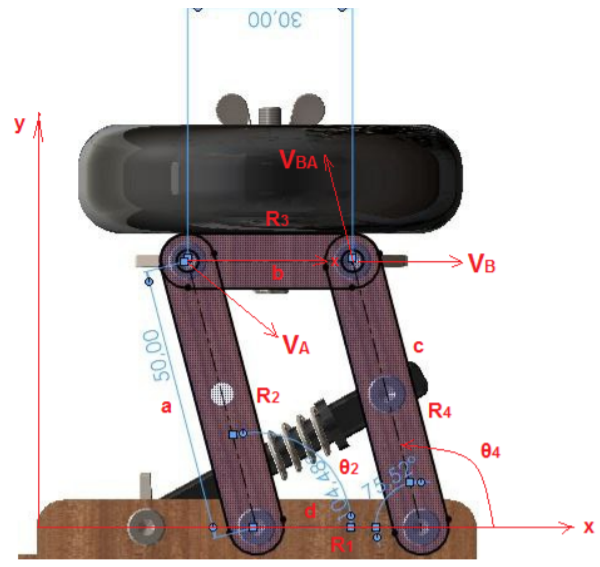

Desenhando e analisando a malha fechada do nosso mecanismo, concluímos que:

$R_2 + R_3 - R_4 - R_1 = 0$

Sendo esta a equação vetorial da nossa malha fechada.

Iremos então converter os vetores dos comprimentos dos elos para a forma de números complexos, representado-os com a, b, c, d, sendo estes valores escalares.

Começamos importando as bibliotecas que serão utilizadas no desenvolvimento do programa.

In [ ]:
from sympy import *
import numpy as ny
import matplotlib.pyplot as plt

Declaramos as variáveis simbólicas:

In [ ]:
a,b,c,d,t,theta1 = symbols('a b c d t theta1')

Declaramos as seguintes variáveis em função do tempo:

In [ ]:
theta2 = Function('theta2')(t)

In [ ]:
theta3 = Function('theta3')(t)

In [ ]:
theta4 = Function('theta4')(t)

Para comodidade usual da linguagem, já que a biblioteca sympy utiliza as seguintes notações de forma maisúscula, fazemos:

In [ ]:
e = E
i = I

A partir da nossa equação vetorial da malha fechada, obtemos a mesma equação, só que em forma de números complexos:

In [ ]:
eq1 = a*e**(i*theta2) + b*e**(i*theta3) - c*e**(i*theta4) - d*e**(i*theta1)
eq1

a*exp(I*theta2(t)) + b*exp(I*theta3(t)) - c*exp(I*theta4(t)) - d*exp(I*theta1)

Em primeiro lugar queremos encontrar $ω_3$ e $ω_4$, então derivamos então a equação 1 em relação ao tempo.

In [ ]:
eq2 = eq1.diff(t)
eq2

I*a*exp(I*theta2(t))*Derivative(theta2(t), t) + I*b*exp(I*theta3(t))*Derivative(theta3(t), t) - I*c*exp(I*theta4(t))*Derivative(theta4(t), t)

Agora substituímos as derivadas de $θ_2$, $θ_3$ e $θ_4$ no tempo por $w_2$, $w_3$ e $w_4$, respectivamente.

In [ ]:
omega2,omega3,omega4 = symbols('omega2 omega3 omega4')

In [ ]:
dict_omegas = {theta2.diff(t):omega2,theta3.diff(t):omega3,theta4.diff(t):omega4}
dict_omegas

{Derivative(theta2(t), t): omega2,
 Derivative(theta3(t), t): omega3,
 Derivative(theta4(t), t): omega4}

Substituindo os valores desse dicionário na equação 2, obtemos:

In [ ]:
eq2 = eq2.subs(dict_omegas)
eq2

I*a*omega2*exp(I*theta2(t)) + I*b*omega3*exp(I*theta3(t)) - I*c*omega4*exp(I*theta4(t))

Temos definido então que:\
\
$V_A = iaω_2eiθ_2$\
$V_BA = ibω_3eiθ_3$\
$V_B = icω_4eiθ_4$

Definimos então estas variáveis:

In [ ]:
V_A = i*a*omega2*e**(i*theta2)
V_BA = i*b*omega3*e**(i*theta3)
V_B = i*c*omega4*e**(i*theta4)

Declaramos a identidade de Euler atráves de um dicionário para posterior substituição.

In [ ]:
id_euler = {e**(i*theta2): cos(theta2) + i*sin(theta2),
            e**(i*theta3): cos(theta3) + i*sin(theta3),
            e**(i*theta4): cos(theta4) + i*sin(theta4)}

A equação 3 será o resultado da substituição da identidade de Euler na equação 2.

In [ ]:
eq3 = eq2.subs(id_euler)
eq3

I*a*omega2*(I*sin(theta2(t)) + cos(theta2(t))) + I*b*omega3*(I*sin(theta3(t)) + cos(theta3(t))) - I*c*omega4*(I*sin(theta4(t)) + cos(theta4(t)))

Expandimos a equação 3:

In [ ]:
eq3 = eq3.expand()
eq3

-a*omega2*sin(theta2(t)) + I*a*omega2*cos(theta2(t)) - b*omega3*sin(theta3(t)) + I*b*omega3*cos(theta3(t)) + c*omega4*sin(theta4(t)) - I*c*omega4*cos(theta4(t))

Agora, separamos a parte real presente na equação 3, substituindo os valores imaginários por zero.

In [ ]:
eq3_real = eq3.subs(i,0)
eq3_real

-a*omega2*sin(theta2(t)) - b*omega3*sin(theta3(t)) + c*omega4*sin(theta4(t))

E separamos a parte imaginária presente na equação 3, subtraindo da equação 3 a parte real presente, restando então a parte imaginária, sendo esta substituída por $i = 1$.

In [ ]:
eq3_im = (eq3 - eq3_real).subs(i,1)
eq3_im

a*omega2*cos(theta2(t)) + b*omega3*cos(theta3(t)) - c*omega4*cos(theta4(t))

Calculamos então a solução para os valores de $w_3$ e $w_4$, a partir da equação real e imaginária obtidas anteriormente.

In [ ]:
sol_omegas = solve([eq3_im,eq3_real],omega3,omega4)
sol_omegas

{omega3: -a*omega2*sin(theta2(t) - theta4(t))/(b*sin(theta3(t) - theta4(t))),
 omega4: -a*omega2*sin(theta2(t) - theta3(t))/(c*sin(theta3(t) - theta4(t)))}

#### Velocidades lineares

Substituindo as soluções de $w_3$ e $w_4$ nas equações de velocidade $V_A$, $V_BA$ e $V_B$, obtemos as velocidades lineares do nosso mecanismo.

In [ ]:
V_A.subs(sol_omegas)

I*a*omega2*exp(I*theta2(t))

In [ ]:
V_BA.subs(sol_omegas)

-I*a*omega2*exp(I*theta3(t))*sin(theta2(t) - theta4(t))/sin(theta3(t) - theta4(t))

In [ ]:
V_B.subs(sol_omegas)

-I*a*omega2*exp(I*theta4(t))*sin(theta2(t) - theta3(t))/sin(theta3(t) - theta4(t))

#### Velocidades angulares:

Isolamos então a soluções de $w_3$ e $w_4$ em função de $w_2$, obtendo assim, as velocidades angulares do nosso mecanismo.

In [ ]:
sol_omegas[omega3]

-a*omega2*sin(theta2(t) - theta4(t))/(b*sin(theta3(t) - theta4(t)))

In [ ]:
sol_omegas[omega4]

-a*omega2*sin(theta2(t) - theta3(t))/(c*sin(theta3(t) - theta4(t)))

Podemos então plotar a relação de velocidade angular para um mecanismo de 4 barras com os comprimentos dos elos, descritos na tabela a seguir.

Considerando os símbolos a, b, c, d definidos como os elos do nosso mecanismo, temos:
\
$a = 30$\
$b = 50$\
$c = 30$\
$d = 50$

Definindo as soluções de $θ_3$ e $θ_4$, obtemos:

In [ ]:
sol_theta3 = -2*atan((2*a*b*sin(theta2) - sqrt(-a**4 + 4*a**3*d*cos(theta2) + 4*a**2*b**2*sin(theta2)**2 +
4*a**2*b**2*cos(theta2)**2 - 2*a**2*b**2 + 2*a**2*c**2 - 4*a**2*d**2*cos(theta2)**2 - 2*a**2*d**2 - 
4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 
2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 - 2*a*b*cos(theta2) - 2*a*d*cos(theta2) + b**2 + 2*b*d - c**2 + d**2))
sol_theta3


-2*atan((2*a*b*sin(theta2(t)) - sqrt(-a**4 + 4*a**3*d*cos(theta2(t)) + 4*a**2*b**2*sin(theta2(t))**2 + 4*a**2*b**2*cos(theta2(t))**2 - 2*a**2*b**2 + 2*a**2*c**2 - 4*a**2*d**2*cos(theta2(t))**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2(t)) - 4*a*c**2*d*cos(theta2(t)) + 4*a*d**3*cos(theta2(t)) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 - 2*a*b*cos(theta2(t)) - 2*a*d*cos(theta2(t)) + b**2 + 2*b*d - c**2 + d**2))

In [ ]:
sol_theta4 = 2*atan((2*a*c*sin(theta2) - sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 4*a**2*c**2*sin(theta2)**2 +
4*a**2*c**2*cos(theta2)**2 - 2*a**2*c**2 - 4*a**2*d**2*cos(theta2)**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 
4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 + 2*a*c*cos(theta2) - 
2*a*d*cos(theta2) - b**2 + c**2 - 2*c*d + d**2))
sol_theta4

2*atan((2*a*c*sin(theta2(t)) - sqrt(-a**4 + 4*a**3*d*cos(theta2(t)) + 2*a**2*b**2 + 4*a**2*c**2*sin(theta2(t))**2 + 4*a**2*c**2*cos(theta2(t))**2 - 2*a**2*c**2 - 4*a**2*d**2*cos(theta2(t))**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2(t)) - 4*a*c**2*d*cos(theta2(t)) + 4*a*d**3*cos(theta2(t)) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 + 2*a*c*cos(theta2(t)) - 2*a*d*cos(theta2(t)) - b**2 + c**2 - 2*c*d + d**2))

Podemos calcular a relação de velocidade angular, dada pela velocidade angular de saída dividida pela velocidade angular de entrada.

$mV = ω_4/ω_2$

In [ ]:
mV = sol_omegas[omega4]/omega2
mV

-a*sin(theta2(t) - theta3(t))/(c*sin(theta3(t) - theta4(t)))

Substituímos então as soluções de $θ_3$ e $θ_4$ obtidas na equação de $mV$.

In [ ]:
mV = mV.subs(theta3,sol_theta3)
mV = mV.subs(theta4,sol_theta4)

Definimos os comprimentos dos elos do mecanismo e os substituímos na equação da relação de velocidade angular.

In [ ]:
elos = {a: 30, b: 50, c: 30, d: 50}
mV = mV.subs(elos)

Para plotar o gráfico $mV$ x $θ_2$, declaramos que $θ_2$ deve variar de 26,1° (0,455 rad) até 14,48° (0,253 rad) e, que $mV$ deve variar enquanto $θ_2$ sofrer alteração.

In [ ]:
theta2_list = ny.linspace(0.455,0.253,100)

In [ ]:
mV_list = []
for i in range(0,len(theta2_list)):
    mV_list.append(mV.subs(theta2,theta2_list[i]))

Com todos os aspectos definidos, podemos configurar o gráfico para plotá-lo.

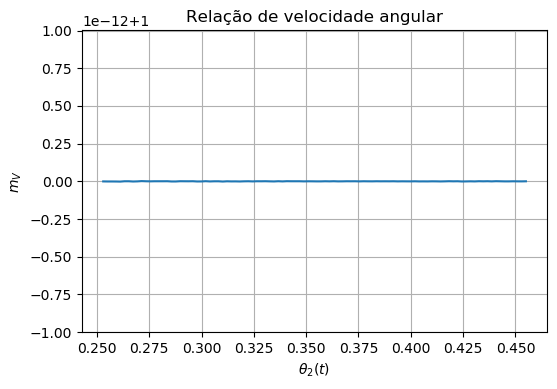

In [ ]:
plt.figure(dpi=100)
plt.plot(theta2_list,mV_list)
plt.xlabel(r'$\theta_2(t)$')
plt.ylabel(r'$m_V$')
plt.title('Relação de velocidade angular')
plt.grid(True)